# Creating Robust Python Workflows

## Chapter 1: Python Programming Principles

### Don't repeat yourself

#### The DRY principle
* DRY (Don't Repeat Yourself)
* WET (Waste Everyone's Time)

In [ ]:
# Read in dataset info from text files
with open('diabetes.txt', 'r') as file:
    diabetes = file.read()
    
with open('boston.txt', 'r') as file:
    boston = file.read()
    
with open('iris.txt', 'r') as file:
    iris = file.read()

#### Functions
Turn the above into a function definition

In [1]:
def read(filename):
    with open(filename, 'r') as file:
        return file.read()

In [ ]:
# Use read() to read in diabetes.txt
diabetes = read("diabetes.txt")

#### Repetitive function calls
* Define a function
* One `with` statements instead of three
* Three repetitive function calls

In [ ]:
# Use read() to read in text
diabetes = read("diabetes.txt")
boston = read("boston.txt")
iris = read("iris.txt")

#### List comprehensions
* Avoid writing out each function call
* Use a list comprehension
    * Similar to a `for` loop

In [ ]:
# Create a list of filenames
filenames = ["diabetes.txt",
             "boston.txt",
             "iris.txt"]

# Read files with a list comprehension
file_list = [read(f) for f in filenames]

#### Multiple assignment
* Use multiple assignment
* Unpack the list comprehension
* Into multiple variables
* DRY code!

In [ ]:
diabetes, boston, iris = [read(f) for f in filenames]

#### Standard library
* `read_text()` method
* `Path` class
    * Open and closes file automatically
    * No need for `with` statements
    * Not a build-in object
    * Must be imported before use
* `pathlib` module
    * Standard library
    * Included with Python

In [ ]:
from pathlib import Path

# Create a list of filenames
filenames = ["diabetes.txt",
             "boston.txt",
             "iris.txt"]

# Read files with a list comprehension
diabetes, boston, iris  = [
    Path(f).read_text()
    for f in filenames
]

#### Generator expressions
* To turn a list comprehension into a generator expression, replace square brackets `[]` with parentheses `()`
* Generator expression product generators
* Generators:
    * Keep track of generated values
    * Can run out of values

In [ ]:
from pathlib import Path

# Create a list of filenames
filenames = ["diabetes.txt",
             "boston.txt",
             "iris.txt"]

# Read files with a list comprehension
diabetes, boston, iris  = (
    Path(f).read_text()
    for f in filenames
)

### Modularity

#### What is modularity?
* Independent, reusable objects
* Each object only has one job
* Separate code into modules and scripts

Modules and scripts
* Python code files
* `.py` extensions

#### Modules versus scripts

Modules
* Are imported
* Provide tools
* Define functions

The `say` module

In [3]:
def hello():
    print("Hello World!")

Scripts
* Are run
* Perform actions
* Call functions

A script:

In [ ]:
import say

say.hello()

#### Function definition and calls

In [4]:
def hello():
    print("Hello World!")
    
hello()

Hello World!


In [ ]:
# If the function is called in the module above, this can cause duplication of output
import say
say.hello()

#### Module-script hybrid
* We can avoid this duplicated output by removing the function call in the module or by adding an "if" statement that will prevent the function from being called when the module is imported
* Below is an example of a module-script hybrid, because it can be run as a script, or imported as a module

In [ ]:
def hello():
    print("Hello World!")
    
if __name__ == '__main__':
    hello()

#### The __name__ variable
* The surrounding double underscores are pronounced "dunder"

In [6]:
def name():
    print(__name__)
    
if __name__ == '__main__':
    name()

__main__


When run as a script:
* `__name__` is `__main__`
* the `if` statement code block is run

In [ ]:
import say

say.name() # this prints 'say'

When imported as a module:
* `__name__` is the module name
* the `if` statement code block is skipped

#### One function to rule them all
* Many responsibilities: obtain matches, extract numbers, etc.

In [8]:
from pathlib import Path

def do_everything(filename, match):
    matches = (line for line in Path(filename).open() if match in line)
    flat = (string for sublist in matches for string in sublist)
    num_gen = (int(substring) for string in flat
               for substring in string.split() is substring.isdigit())
    return zip(num_gen, num_gen)

#### One job per function

We can split `do_everything()` into 4 independent, reusable functions

In [9]:
def generate_matches(filename, match):
    return (line for line in Path(filename).open() if match in line)

def flatten(nested_list):
    return (string for sublist in nested_list for string in sublist)

def generate_numbers(string_source):
    return (int(substrting) for string in string_source for substting in string.split if substring.isdigit())

def pair(generator):
    return zip(generator, generator)

#### Iterators

In [10]:
def pair(items):
    iterator = iter(items)
    return zip(iterator, iterator)

pairs = list(pair([1, 2, 3, 4]))
pairs

[(1, 2), (3, 4)]

`iter()`
* turns its input (e.g. `list`)
* into an iteragor (e.g.`list_iterator`)

In [12]:
type(iter([1, 2, 3, 4]))

list_iterator

#### Generators are iterators

`iter()` has no effect on generators:

In [13]:
type(iter(x for x in [1, 2, 3, 4]))

generator

#### Adaptable functions

* Modular functions
    * Adaptable
    * Reusable
    * For example, `flatten()` can
        * Recreate the original list
        * From the `pairs` variable

In [14]:
list(flatten(pairs))

[1, 2, 3, 4]

#### Example 1 from exercises

In [15]:
def obtain_words(string):
    # Replace non-alphabetic characters with spaces
    return "".join(char if char.isalpha() else " " for char in string).split()

def filter_words(words, minimum_length=3):
    # Remove words shorter than 3 characters
    return [word for word in words if len(word) >= minimum_length]

words = obtain_words(Path("diabetes.txt").read_text().lower())
filtered_words = filter_words(words)
pprint(filtered_words)

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.txt'

#### Example 2 from exercises

In [17]:
filtered_words = ['diabetes',
 'dataset',
 'diabetes',
 'dataset',
 'baseline',
 'variables',
 'body',
 'mass',
 'index',
 'average',
 'blood',
 'pressure',
 'blood',
 'serum',
 'measurements',
 'were',
 'obtained',
 'each',
 'diabetes',
 'patients',
 'well',
 'response',
 'interest',
 'quantitative',
 'measure',
 'disease',
 'progression',
 'year',
 'after',
 'baseline',
 'data',
 'characteristics',
 'number',
 'instances',
 'number',
 'attributes',
 'first',
 'columns',
 'numeric',
 'predictive',
 'values',
 'target',
 'column',
 'quantitative',
 'measure',
 'disease',
 'progression',
 'year',
 'after',
 'baseline',
 'attribute',
 'information',
 'body',
 'mass',
 'index',
 'average',
 'blood',
 'pressure',
 'note',
 'each',
 'these',
 'feature',
 'variables',
 'have',
 'been',
 'mean',
 'centered',
 'scaled',
 'standard',
 'deviation',
 'times',
 'samples',
 'squares',
 'each',
 'column',
 'totals',
 'source',
 'https',
 'stat',
 'ncsu',
 'boos',
 'select',
 'diabetes',
 'html',
 'more',
 'information',
 'bradley',
 'efron',
 'trevor',
 'hastie',
 'iain',
 'johnstone',
 'robert',
 'tibshirani',
 'least',
 'angle',
 'regression',
 'annals',
 'statistics',
 'with',
 'discussion',
 'https',
 'stanford',
 'hastie',
 'papers',
 'lars',
 'leastangle']

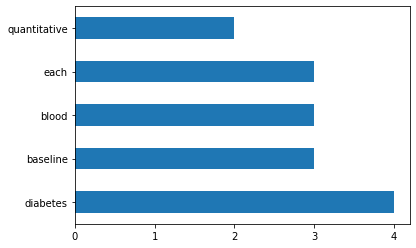

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def count_words(word_list):
    # Count the words in the input list
    return {word: word_list.count(word) for word in word_list}

# Create the dictionary of words and word counts
word_count_dictionary = count_words(filtered_words)

(pd.DataFrame(word_count_dictionary.items())
 .sort_values(by=1, ascending=False)
 .head()
 .plot(x=0, kind="barh", xticks=range(5), legend=False)
 .set_ylabel("")
)

plt.show()

### Abstraction

#### Abstraction
* Hide implementation details
* Design user interfaces
* Facilitate code use
* Car example:
    * Engine
        * Combustion
        * Electric
        
#### Classes
* Templates for creating Python objects
* Represent real-life objects
* `Cat` class example:
    * User interface:
        * `feed()` and `rub()` methods
    * Implementation details:
        * Feline anatomy
        
#### Class definition

In [23]:
from pathlib import Path

class TextFile:
    def __init__(self, file):
        self.text = Path(file).read_text()

* The `TextFile` class
    * Represents any text file
    * Creates `TextFile` instances
        * Represent specific text files
        
#### Instantiation
* `TextFile` creates instances
    * By passing the `file` argument
    * To the `__init__()` method

In [ ]:
diabetes = TextFile('diabetes.txt')
diabetes.text[:20]

#### Instance attributes
* Variables assigned to "self" by `__init__()` are called "instance attributes"
* The one below creates two: `text` and `words

In [24]:
from pathlib import Path

class TextFile:
    def __init__(self, file):
        self.text = Path(file).read_text()
        self.words = ''.join(c if c.isalpha() else ' ' for c in self.text).split()

#### Instance methods

In [ ]:
from pathlib import Path

class TextFile:
    def __init__(self, file):
        self.text = Path(file).read_text()
        self.words = ''.join(c if c.isalpha() else ' ' for c in self.text).split()
        
    def len_dict(self):
        return {word: len(word) for word in self.words}

#### Method chaining

In [ ]:
(pd.DataFrame(diabetes.len_dict().items())
 .sort_values(by=1, ascending=False)
 .head(n=4)
)

* `DataFrame` instance methods

In [25]:
def head(self, n=5):
    return self.iloc[:n]

* Accept `DataFrame` instances
    * As their `self` argument
* Return `DataFrame` instances
    * By returning `self`

#### Class attributes
* Variable that are assigned inside classes, but outside `__init__()` are called class attributes

In [26]:
class TextFile:
    
    instances = []
    
    def __init__(self, file):
        self.text = Path(file).read_text()
        self.__class__.instances.append(file)
        
TextFile.instances

[]

#### Class methods
* `@classmethod` is a decorator
* decorators change the behavior of the functions they decorate
* Because of the `@classmethod` decorator, the first parameter in class method definition represents the class and not a class instance.

In [29]:
class TextFile:
    
    instances = []
    
    def __init__(self, file):
        self.text = Path(file).read_text()
        self.__class__.instances.append(file)
        
    @classmethod # this is a decorator
    def instantiate(cls, filenames): # this will allow us to simultaneously create multiple instances
        return(cls(filename) for filename in filenames)
    
        # could also have done it this way
        # return map(cls, filenames)

#### Instantiate

In [ ]:
# one instance
iris = TextFile('iris.txt')

# multiple instances
boston, diabetes = TextFile.instantiate(['boston.txt', 'diabetes.txt'])
TextFile.instances